In [2]:
# Montar Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# CNN

Este código é uma implementação completa de uma Rede Neural Convolucional (CNN) para classificar imagens em duas categorias: "Normal" e "Covid". Ele foi projetado para ser executado no ambiente do Google Colab e utiliza diversas bibliotecas Python, como TensorFlow, NumPy e Matplotlib.

Após o teste de hiperparâmetros ficou constatado que a melhor combinação é: Melhor combinação de hiperparâmetros:
Épocas: 15
Tamanho do Lote (Batch Size): 16
Taxa de Aprendizado: 0.001
Acurácia de Treinamento: 0.921875
Acurácia de Validação: 0.96875
Que será aplicada no treinamento do modelo agora.

In [3]:
# Bibliotecas:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import datetime

In [4]:
# Definindo os caminhos:
BASE_PATH = '/content/drive/MyDrive/CNN_COVID/Dados_divididos'
train_dir = os.path.join(BASE_PATH, 'train')
test_dir = os.path.join(BASE_PATH, 'test')

In [5]:
# Verificar a existência dos diretórios de dados:

for dir in [train_dir, test_dir]:
    if not os.path.exists(dir):
        raise FileNotFoundError(f"Diretório não encontrado: {dir}")

In [6]:
# Contando as imagens antes de passar pelo aumento de dados:
def count_images(directory):
    total = 0
    for root, dirs, files in os.walk(directory):
        total += len(files)
    return total

print(f"O diretório de treinamento contém {count_images(train_dir)} imagens.")
print(f"O diretório de teste contém {count_images(test_dir)} imagens.")

O diretório de treinamento contém 1459 imagens.
O diretório de teste contém 626 imagens.


In [7]:
# Inicialização da CNN:
classifier = tf.keras.Sequential([ #criando o modelo sequencial
    tf.keras.layers.Conv2D(32, 3, padding="same", input_shape=(64, 64, 3), activation='relu'), #primeira camada convolucional
    tf.keras.layers.MaxPooling2D(), #primeira camada de pooling
    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"), #camada convolucionalcom 64 filtros
    tf.keras.layers.MaxPooling2D(),  #camada de pooling com um tamanho de janela 2x2
    tf.keras.layers.Flatten(), #camada de achatamento
    tf.keras.layers.Dense(128, activation='relu'), #camada densa com 128 neurônios
    tf.keras.layers.Dense(1, activation='sigmoid') #camada de saída
])

In [8]:
# Compilando o modelo:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 16384)             0         
                                                                 
 dense (Dense)               (None, 128)               2

In [9]:
# ImageDataGenerator:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=16,
    class_mode='binary'
)

Found 1459 images belonging to 2 classes.
Found 625 images belonging to 2 classes.


In [10]:
# Imprima a codificação das labels:
print("Codificação das labels para o conjunto de treinamento:")
print(training_set.class_indices)

Codificação das labels para o conjunto de treinamento:
{'Covid': 0, 'Normal': 1}


In [11]:
# Treinamento:
history = classifier.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=15,
    validation_data=test_set,
    validation_steps=len(test_set),
)

Epoch 1/15
92/92 [==============================] - 414s 4s/step - loss: 0.2562 - accuracy: 0.8897 - val_loss: 0.1917 - val_accuracy: 0.9216
Epoch 2/15
92/92 [==============================] - 43s 473ms/step - loss: 0.1201 - accuracy: 0.9575 - val_loss: 0.4022 - val_accuracy: 0.8528
Epoch 3/15
92/92 [==============================] - 43s 472ms/step - loss: 0.1283 - accuracy: 0.9507 - val_loss: 0.0785 - val_accuracy: 0.9760
Epoch 4/15
92/92 [==============================] - 52s 558ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.0876 - val_accuracy: 0.9728
Epoch 5/15
92/92 [==============================] - 44s 477ms/step - loss: 0.0699 - accuracy: 0.9719 - val_loss: 0.0604 - val_accuracy: 0.9792
Epoch 6/15
92/92 [==============================] - 44s 482ms/step - loss: 0.0520 - accuracy: 0.9815 - val_loss: 0.0498 - val_accuracy: 0.9856
Epoch 7/15
92/92 [==============================] - 44s 479ms/step - loss: 0.0529 - accuracy: 0.9781 - val_loss: 0.0520 - val_accuracy: 0.9840
E

In [12]:
total_images_processed = len(training_set) * 16 #total de imagens processadas em uma época

In [13]:
total_images_processed

1472

In [14]:
# Salvando o modelo:
#classifier.save('/content/drive/MyDrive/CNN_COVID/meu_modelo_final.h5')

In [15]:
# Avaliação do modelo carregado:
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/CNN_COVID/meu_modelo_final.h5')
#loaded_model.evaluate(test_set)

In [16]:
# Avaliação do modelo original:
loss, accuracy = classifier.evaluate(test_set)
print("Perda:", loss)
print("Acurácia:", accuracy)

40/40 [==============================] - 13s 318ms/step - loss: 0.0610 - accuracy: 0.9840
Perda: 0.060989703983068466
Acurácia: 0.984000027179718


In [19]:
# Predições:
from PIL import Image

def is_image(file_path):
    try:
        Image.open(file_path)
        return True
    except IOError:
        return False

y_pred = []
y_test = []

NORMAL_TEST_DIR = os.path.join(test_dir, "Normal")
COVID_TEST_DIR = os.path.join(test_dir, "Covid")

for path, label in [(NORMAL_TEST_DIR, 1), (COVID_TEST_DIR, 0)]:
    for i in os.listdir(path):
        img_path = os.path.join(path, i)
        if is_image(img_path):
            img = image.load_img(img_path, target_size=(64, 64))
            img = image.img_to_array(img)
            img = np.expand_dims(img, axis=0)
            p = classifier.predict(img)
            y_test.append(p[0, 0])
            y_pred.append(label)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

1/1 [==============================] - 0s 31ms/step


Text(0.5, 1.0, 'Matriz de Confusão')

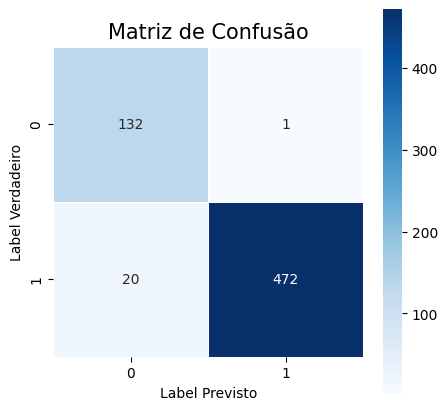

In [20]:
# Calculando a matriz de confusão:
cm = confusion_matrix(y_test.round(), y_pred)

# Calculando sensibilidade e especificidade:
true_positive = cm[0][0]
false_positive = cm[0][1]
true_negative = cm[1][1]
false_negative = cm[1][0]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Matriz de Confusão', size=15)

In [22]:
print(f'Sensibilidade (Recall): {sensitivity}')
print(f'Especificidade: {specificity}')

Sensibilidade (Recall): 0.868421052631579
Especificidade: 0.9978858350951374


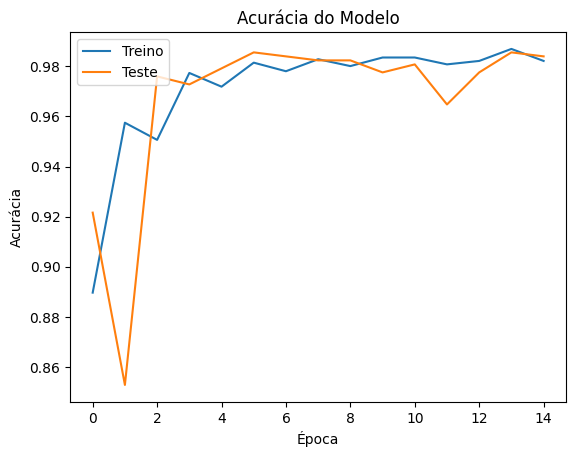

In [23]:
# Grafico de acurácia:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

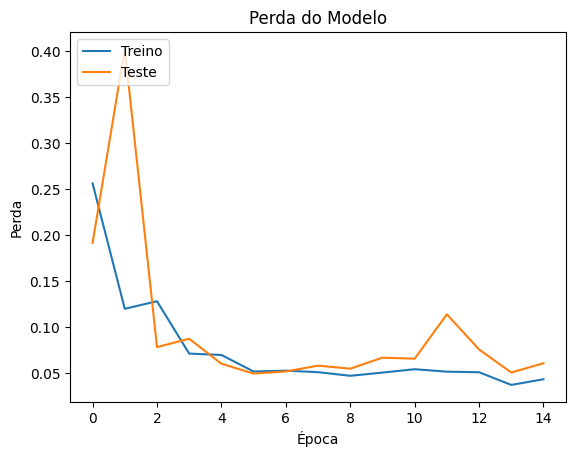

In [24]:
# Gráfico de perda:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 26ms/step
Normal


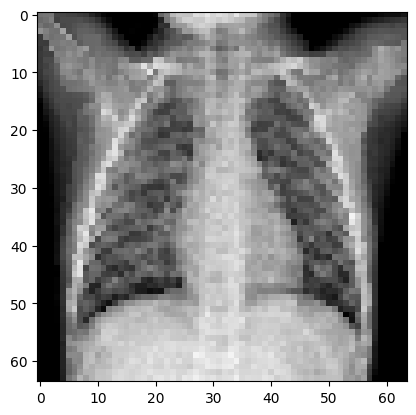

In [25]:
# Predição em uma imagem única da base Normal:
test_image = image.load_img(r'/content/drive/MyDrive/CNN_COVID/Dados_divididos/test/Normal/IM-0135-0001.jpeg',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

1/1 [==============================] - 0s 23ms/step
Covid


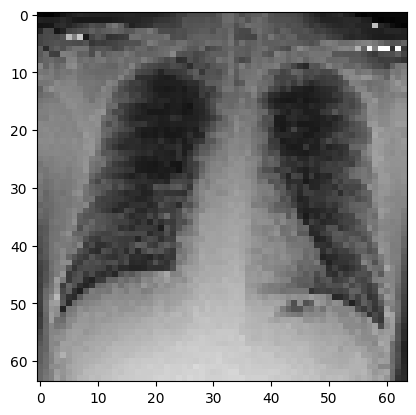

In [26]:
# Predição em uma imagem única da base COVID:
test_image = image.load_img(r'/content/drive/MyDrive/CNN_COVID/Dados_divididos/test/Covid/1-s2.0-S1931312820301852-gr1_lrg-c.png',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

In [27]:
# Calcular a AUC-ROC
auc_roc = roc_auc_score(y_test.round(), y_pred)
print(f'AUC-ROC: {auc_roc}')

AUC-ROC: 0.9759153982517268


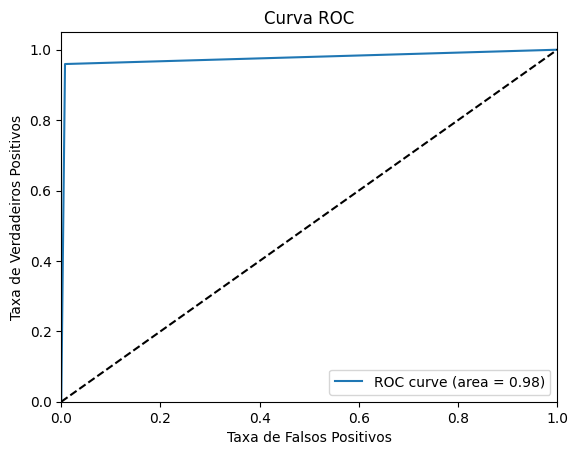

In [28]:
# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test.round(), y_pred)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

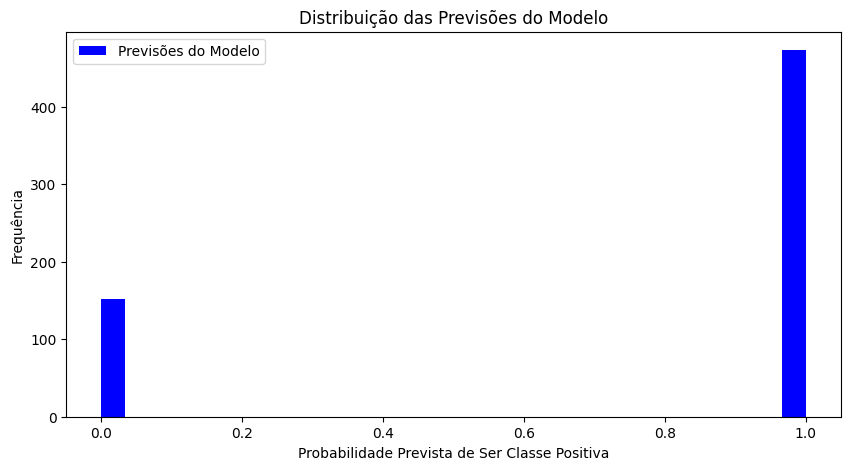

In [29]:
# Histograma das previsões pode mostrar se o modelo está incerto sobre certas classificações
plt.figure(figsize=(10, 5))
plt.hist(y_pred, bins=30, label='Previsões do Modelo', color='blue')
plt.xlabel('Probabilidade Prevista de Ser Classe Positiva')
plt.ylabel('Frequência')
plt.title('Distribuição das Previsões do Modelo')
plt.legend()
plt.show()

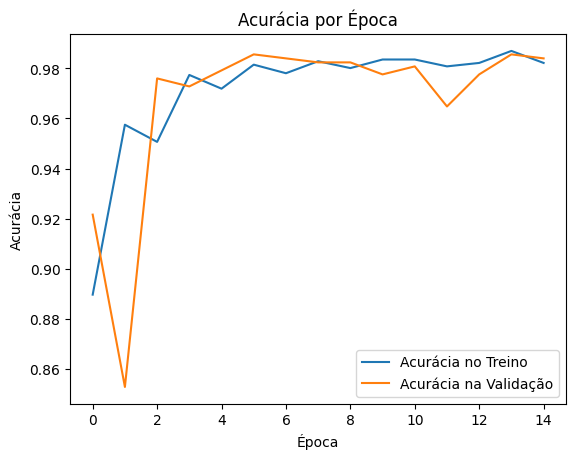

In [30]:
# Gráfico de Métricas por Época
plt.plot(history.history['accuracy'], label='Acurácia no Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()
plt.show()

In [31]:
# Impressão do relatório de classificação:
print(classification_report(y_pred, y_test.round()))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       152
           1       0.96      1.00      0.98       473

    accuracy                           0.97       625
   macro avg       0.98      0.93      0.95       625
weighted avg       0.97      0.97      0.97       625



No seu caso, “support” é 152 para a classe 0 e 473 para a classe 1. Isso significa que, no conjunto de dados de teste, há 152 imagens que são da classe 0 (Normal) e 473 imagens que são da classe 1 (Covid).